# PCA Gaussian

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]

<ipython-input-18-0f7e0d049c00>:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax4.plot(rotated_cloud[0,:],rotated_cloud[1,:], '.', Color='k')
<ipython-input-18-0f7e0d049c00>:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.plot(ori_cloud[0,:],ori_cloud[1,:], '.', Color='k')
<ipython-input-18-0f7e0d049c00>:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.plot(moved_cloud[0,:],moved_cloud[1,:], '.', Color='k')
<ipython-input-18-0f7e0d049c00>:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax3.plot(stretched_cloud[0,:],stretched_cloud[1,:], '.', Color='k')


(-12.0, 12.0)

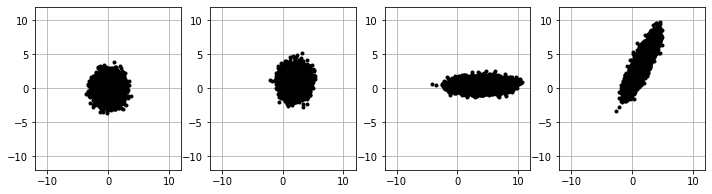

In [18]:
np.random.seed(43)
nPoints = 10000   # Create 10,000 points
ori_cloud  =  np.random.randn(2,nPoints)

xC = np.array([2, 1]) # Center of data (mean)
moved_cloud = np.random.randn(2,nPoints) + np.diag(xC)@ np.ones((2,nPoints))

sig = np.array([2, 0.5])   # Principal axes
stretched_cloud = np.diag(sig) @ moved_cloud

theta = np.pi/3            # Rotate cloud by pi/3
R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])
rotated_cloud = R @ stretched_cloud

X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))
fig = plt.figure(figsize=(12,3))
ax4 = fig.add_subplot(144)
ax4.plot(rotated_cloud[0,:],rotated_cloud[1,:], '.', Color='k')
ax4.grid()
plt.xlim((-12, 12))
plt.ylim((-12,12))
ax1 = fig.add_subplot(141)
ax1.plot(ori_cloud[0,:],ori_cloud[1,:], '.', Color='k')
ax1.grid()
plt.xlim((-12, 12))
plt.ylim((-12,12))
ax2 = fig.add_subplot(142)
ax2.plot(moved_cloud[0,:],moved_cloud[1,:], '.', Color='k')
ax2.grid()
plt.xlim((-12, 12))
plt.ylim((-12,12))
ax3 = fig.add_subplot(143)
ax3.plot(stretched_cloud[0,:],stretched_cloud[1,:], '.', Color='k')
ax3.grid()
plt.xlim((-12, 12))
plt.ylim((-12,12))

<ipython-input-20-e5de1b0119ad>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.plot(X[0,:],X[1,:], '.', Color='k')
<ipython-input-20-e5de1b0119ad>:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.plot(X[0,:],X[1,:], '.', Color='k')   # Plot data to overlay PCA
<ipython-input-20-e5de1b0119ad>:27: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',LineWidth=3)
<ipython-input-20-e5de1b0119ad>:28: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',LineWidth=3)
<ipython-input-20-e5de1b0119ad>:29: Matplotlib

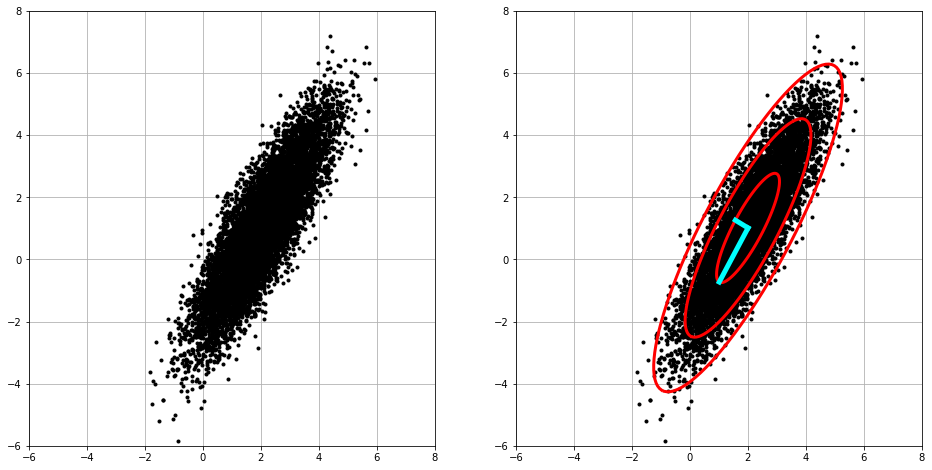

In [20]:

## f_ch01_ex03_1b
# Compute eigen vector
Xavg = np.mean(X,axis=1)                  # Compute mean
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=0)



theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

# visualization
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', Color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', Color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))
ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',LineWidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',LineWidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',LineWidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',LineWidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',LineWidth=5)

plt.show()

# Ovarian Cancer

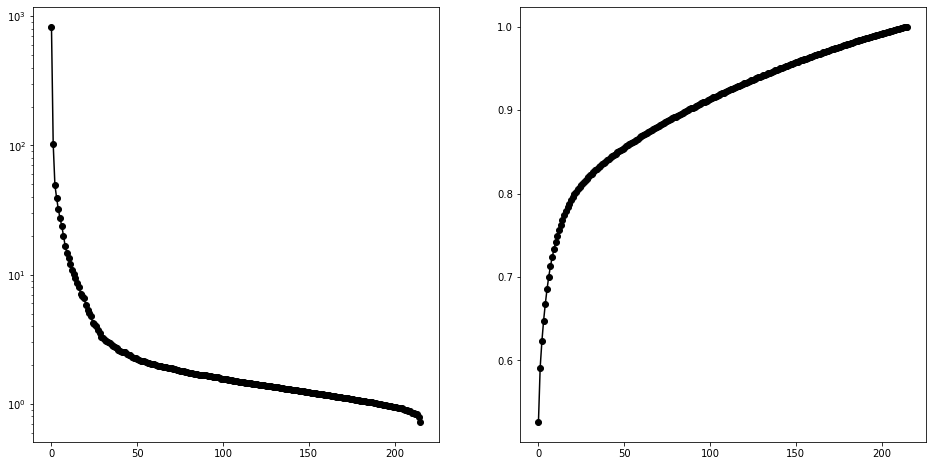

In [23]:
obs = np.loadtxt(os.path.join('..','DATA','ovariancancer_obs.csv'),delimiter=',')

f = open(os.path.join('..','DATA','ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")

U, S, VT = np.linalg.svd(obs,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()

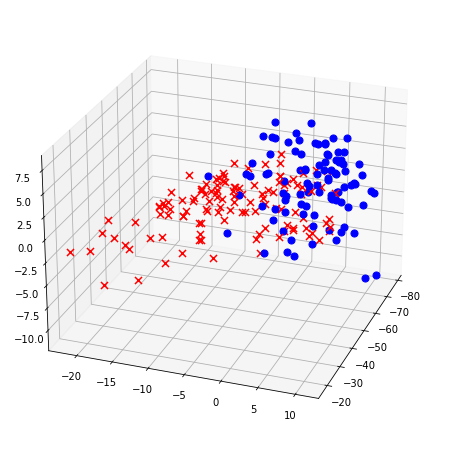

In [24]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T
    z = VT[2,:] @ obs[j,:].T

    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,20)
plt.show()

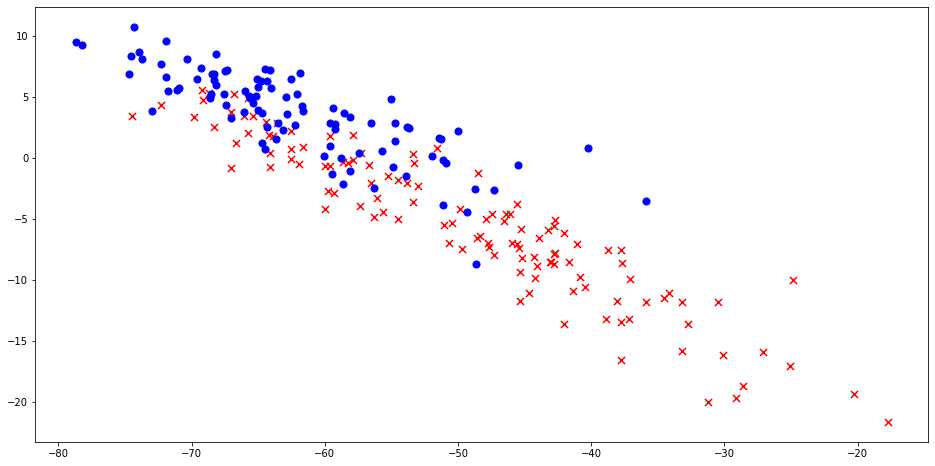

In [27]:
fig2 = plt.figure()
for j in range(obs.shape[0]):
    x = VT[0,:] @ obs[j,:].T
    y = VT[1,:] @ obs[j,:].T

    if grp[j] == 'Cancer':
        plt.scatter(x,y,marker='x',color='r',s=50)
    else:
        plt.scatter(x,y,marker='o',color='b',s=50)


plt.show()